<a href="https://colab.research.google.com/github/claredavies/Image3DCoursework/blob/main/Image3DTemplateMatching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/bmalcover/image3D.git

fatal: destination path 'image3D' already exists and is not an empty directory.


Import Libraries

# **Pattern Matching**
Extracted from the OpenCV documentation:

OpenCV comes with a function matchTemplate for this purpose. It simply slides the template image over the input image and compares the template and patch of input image under the template image.

**Exercise**
Given the following image and the corresponding template, you have to paint a green dot in the center of as many diamonds as you can but minimizing the number of False Positives (false detections).

**Conditions:** You can't manipulate any image outside the program.

**Deadline:** Friday 7th, 19:00h

Load Images

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [5]:
def template_matching(image, template, threshold):
  # Store width and height of template in w and h
  h = template.shape[0]
  w = template.shape[1]
  
  # Perform match operations.
  # need to add in to take into account background, rotation and different sizes
  res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
  
  # Store the coordinates of matched area in a numpy array
  loc = np.where(res >= threshold)
  
  # Draw a rectangle around the matched region.
  for pt in zip(*loc[::-1]):
      (startX, startY) = pt
      endX = startX + template.shape[1]
      endY = startY + template.shape[0]
      centreX = (startX + endX)/2
      centreY = (startY + endY)/2

      cv2.circle(image, (int(centreX), int(centreY)), 1, (0, 255, 0), 1)
  
  cv2_imshow(image)

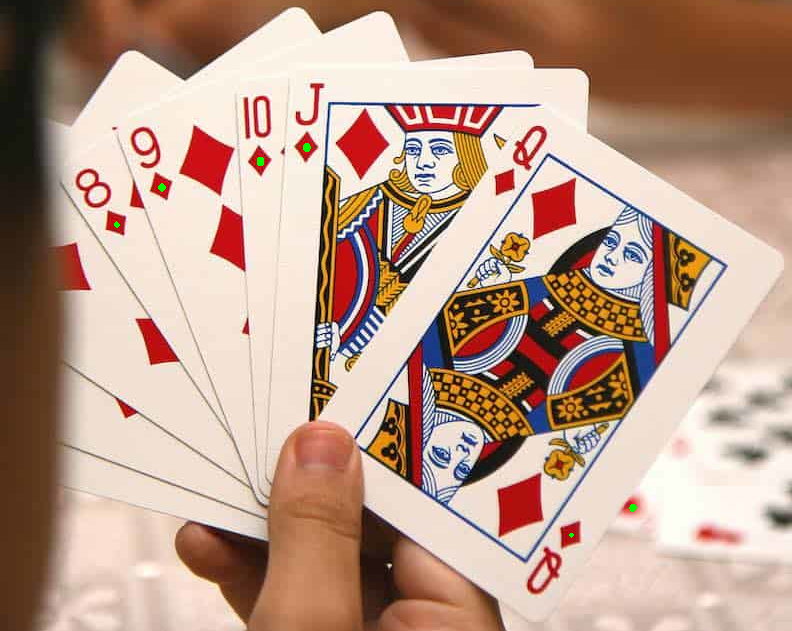

In [6]:
# Load images in the BGR space
img_rgb = cv2.imread("image3D/Pattern Matching/input/cards_mini.png")
template = cv2.imread("image3D/Pattern Matching/input/diamond.png")
 
# Show the final image with the matched area.
template_matching(img_rgb, template, 0.75)